# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['mestia',
 'hualmay',
 'tessalit',
 'ferrol',
 'ambilobe',
 'bredasdorp',
 'ostrovnoy',
 'severnoye',
 'taolanaro',
 'illoqqortoormiut',
 'alotau',
 'albany',
 'sentyabrskiy',
 'hamilton',
 'port alfred',
 'port hardy',
 'hithadhoo',
 'barrow',
 'butaritari',
 'faanui',
 'hermanus',
 'puerto ayora',
 'jamestown',
 'nefteyugansk',
 'lebu',
 'barra patuca',
 'maghama',
 'dudinka',
 'tasiilaq',
 'bluff',
 'rikitea',
 'hambantota',
 'busselton',
 'fallon',
 'thompson',
 'atuona',
 'attawapiskat',
 'coquimbo',
 'meulaboh',
 'punta arenas',
 'ushuaia',
 'tuatapere',
 'okahandja',
 'mount gambier',
 'kamenka',
 'severo-kurilsk',
 'santa isabel do rio negro',
 'dunedin',
 'vaini',
 'asfi',
 'leningradskiy',
 'east london',
 'lobito',
 'gonda',
 'tuktoyaktuk',
 'touros',
 'yellowknife',
 'cape town',
 'alofi',
 'carnarvon',
 'hobart',
 'puerto carreno',
 'tura',
 'torbay',
 'ridgecrest',
 'longkou',
 'nikolskoye',
 'chicama',
 'sinnamary',
 'barentsburg',
 'arraial do cabo',
 'stawell',
 'star

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities2 = ['dharan', 'ornskoldsvik', 'bucksport', 'lasa', 'barabai', 'vikhorevka', 'saint-gilles', 'barra do garcas', 'cermik', 'igbo ora', 'taolanaro',
 'illoqqortoormiut',
 'alotau',
 'albany',
 'sentyabrskiy',
 'hamilton',
 'port alfred',
 'port hardy',
 'hithadhoo',
 'barrow',
 'butaritari',
 'faanui',
 'hermanus',
 'puerto ayora',
 'jamestown',
 'nefteyugansk',]

weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url. Test first by appending one city name to the end of f-string. Test get and json-ify.
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

In [4]:
# Get weather data response - test
# weather_response = requests.get(query_url)
# weather_response

In [ ]:
# Json-ify response - test
# weather_json = weather_response.json()
# weather_json

In [5]:
# Loop through each city in cities list (randomly put in list by starter code) and append to open lists. 
# Loop generates respons and json_ifies each response

name = []
lat = []
lon = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
date = []

for city in cities2:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        
    except (KeyError, IndexError):
        print("bad data")
        
    time.sleep(1)
print(name)      

bad data
bad data
bad data
bad data
['Dharān', 'Örnsköldsvik', 'Bucksport', 'Laas', 'Barabai', 'Vikhorevka', 'Saint-Gilles', 'Barra do Garças', 'Çermik', 'Igbo-Ora', 'Albany', 'Hamilton', 'Port Alfred', 'Port Hardy', 'Hithadhoo', 'Barrow', 'Butaritari', 'Faanui', 'Hermanus', 'Puerto Ayora', 'Jamestown', 'Nefteyugansk']


In [6]:
# Convert Raw Data to DataFrame
city_data_df = pd.DataFrame({"City":name, "Latitude":lat, "Longitude":lon, "Max Temperature (F)":temperature, "Humidity (%)":humidity, "Cloud Cover (%)":cloudiness, "Wind Speed (mph)":windspeed, "Date":date})
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Dharān,26.8125,87.2835,56.35,54,0,5.88,1612737939
1,Örnsköldsvik,63.2909,18.7153,19.40,93,90,6.91,1612737668
2,Bucksport,44.5737,-68.7956,27.00,77,100,6.20,1612737941
3,Laas,46.6166,10.7002,39.20,93,90,5.75,1612737942
4,Barabai,-2.5833,115.3833,74.88,93,99,1.39,1612737944


In [7]:
# Inspect the data and remove the cities where the humidity > 100%.
clean_city_data_df = city_data_df[city_data_df["Humidity (%)"] <= 100]
clean_city_data_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Dharān,26.8125,87.2835,56.35,54,0,5.88,1612737939
1,Örnsköldsvik,63.2909,18.7153,19.40,93,90,6.91,1612737668
2,Bucksport,44.5737,-68.7956,27.00,77,100,6.20,1612737941
3,Laas,46.6166,10.7002,39.20,93,90,5.75,1612737942
4,Barabai,-2.5833,115.3833,74.88,93,99,1.39,1612737944


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

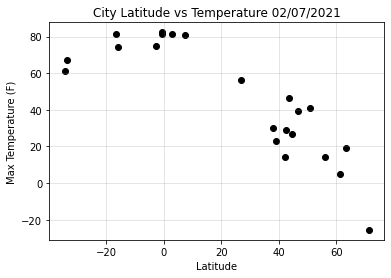

In [8]:
# To convert the access date: https://www.tutorialspoint.com/python/time_strftime.htm
plt.title(f'City Latitude vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Max Temperature (F)"], color="black", marker="o")
plt.show()

##  Latitude vs. Humidity Plot

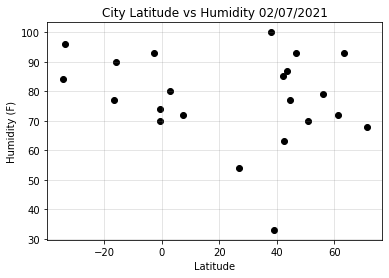

In [9]:
plt.title(f'City Latitude vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity (%)"], color="black", marker="o")
plt.show()

## Latitude vs. Cloudiness Plot

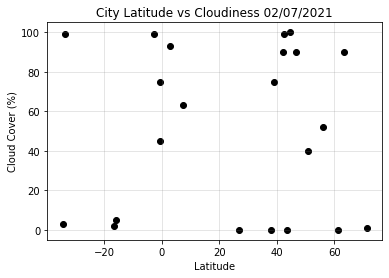

In [10]:
plt.title(f'City Latitude vs Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloud Cover (%)"], color="black", marker="o")
plt.show()

## Latitude vs. Wind Speed Plot

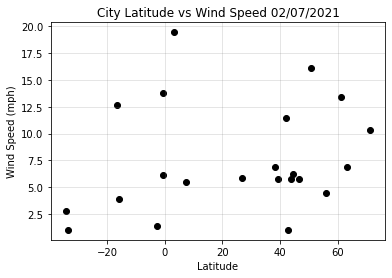

In [11]:
plt.title(f'City Latitude vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed (mph)"], color="black", marker="o")
plt.show()

## Linear Regression

In [12]:
# Find the cities in the northern hemisphere
north_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] > 0]
north_cities.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Dharān,26.8125,87.2835,56.35,54,0,5.88,1612737939
1,Örnsköldsvik,63.2909,18.7153,19.40,93,90,6.91,1612737668
2,Bucksport,44.5737,-68.7956,27.00,77,100,6.20,1612737941
3,Laas,46.6166,10.7002,39.20,93,90,5.75,1612737942
5,Vikhorevka,56.1201,101.1636,14.00,79,52,4.47,1612737945


In [19]:
# Find the cities in the southern hemisphere
south_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0]
south_cities.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
4,Barabai,-2.5833,115.3833,74.88,93,99,1.39,1612737944
7,Barra do Garças,-15.8900,-52.2567,74.12,90,5,3.94,1612737722
12,Port Alfred,-33.5906,26.8910,66.99,96,99,1.01,1612737845
14,Hithadhoo,-0.6000,73.0833,81.68,70,45,6.17,1612737760
17,Faanui,-16.4833,-151.7500,81.27,77,2,12.66,1612737768


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

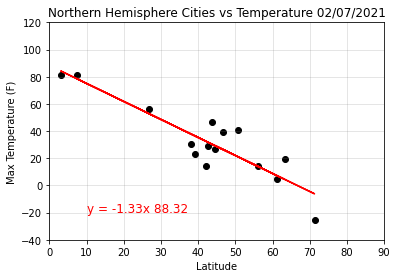

In [14]:
# Set the x and y limits for each graph to include min and max latitude because it is unknow what cities will be
# determined in the random sampling.
x_values = north_cities["Latitude"]
y_values = north_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(0,90)
plt.ylim(-40, 120)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (10,-20), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

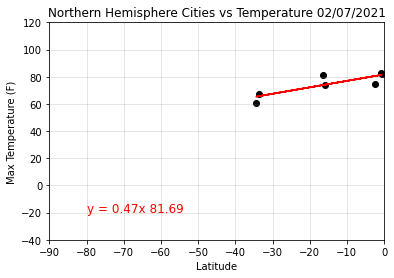

In [15]:
x_values = south_cities["Latitude"]
y_values = south_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90,0)
plt.ylim(-40, 120)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,-20), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

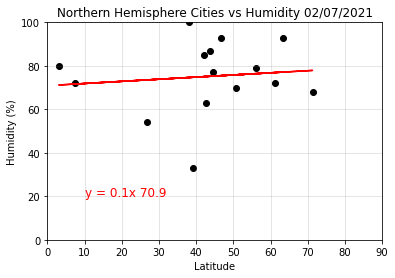

In [20]:
x_values = north_cities["Latitude"]
y_values = north_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(0,90)
plt.ylim(0, 100)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (10,20), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

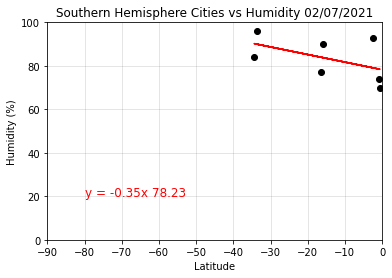

In [21]:
x_values = south_cities["Latitude"]
y_values = south_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,0)
plt.ylim(0, 100)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,20), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

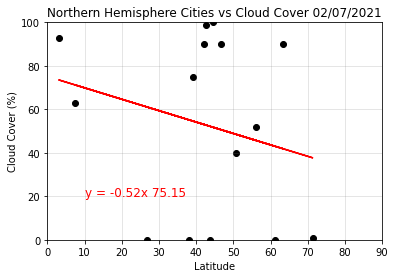

In [22]:
x_values = north_cities["Latitude"]
y_values = north_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(0,90)
plt.ylim(0, 100)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (10,20), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

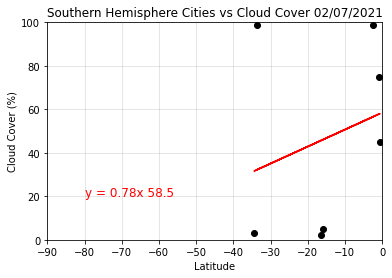

In [23]:
x_values = south_cities["Latitude"]
y_values = south_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-90,0)
plt.ylim(0, 100)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,20), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

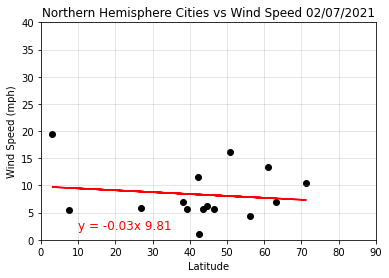

In [24]:
x_values = north_cities["Latitude"]
y_values = north_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(0,90)
plt.ylim(0, 40)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (10,2), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

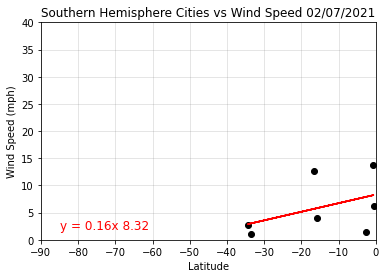

In [25]:
x_values = south_cities["Latitude"]
y_values = south_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,0)
plt.ylim(0,40)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-85,2), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()